In [ ]:
pip install --upgrade scikit-learn

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [4]:
imoveis = pd.read_excel('/content/Cópia de imoveis.xlsx')

In [5]:
imoveis.head()

,area,preco
0,359.87,25000
1,353.12,45000
2,341.89,45000
3,435.99,20000
4,341.77,25000


In [6]:
imoveis.describe()

,area,preco
count,54.000000,54.000000
mean,457.483519,41296.296296
std,261.527053,16488.566227
min,293.220000,20000.000000
25%,355.087500,30000.000000
50%,380.360000,40000.000000
75%,470.087500,50000.000000
max,2057.570000,120000.000000


In [8]:
# Sem variáveis nulas
imoveis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   area    54 non-null     float64
 1   preco   54 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 992.0 bytes


<Axes: xlabel='area', ylabel='Count'>

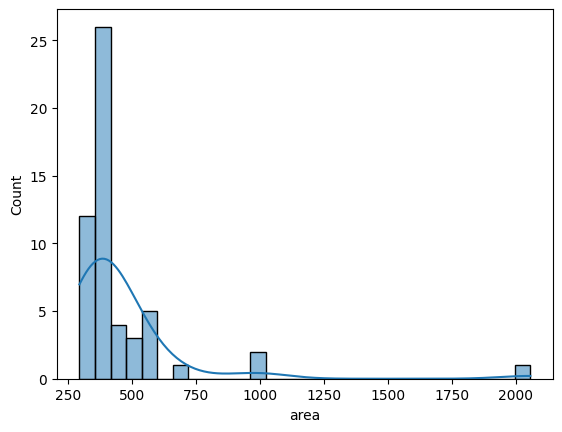

In [11]:
# Podemos ver que a maioria dos imoveis está com o valor muito baixo
# KDE trás a linha de normallidade

sns.histplot(imoveis, x='area', kde=True)

<Axes: xlabel='preco', ylabel='Count'>

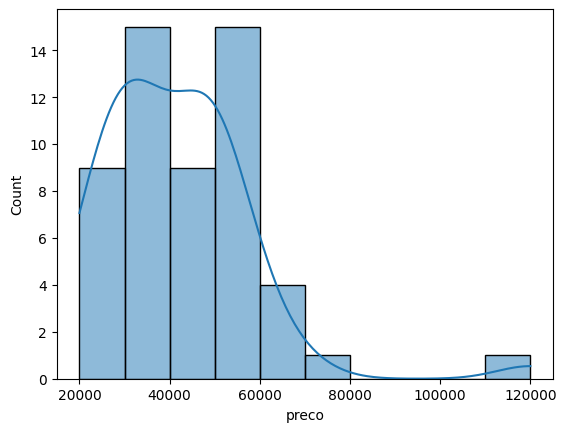

In [12]:
sns.histplot(imoveis, x='preco', kde=True)

In [13]:
# analisando as variáveis
imoveis.corr()
# não é uma correlação muito forte.

,area,preco
area,1.000000,0.511373
preco,0.511373,1.000000


<Axes: xlabel='area', ylabel='preco'>

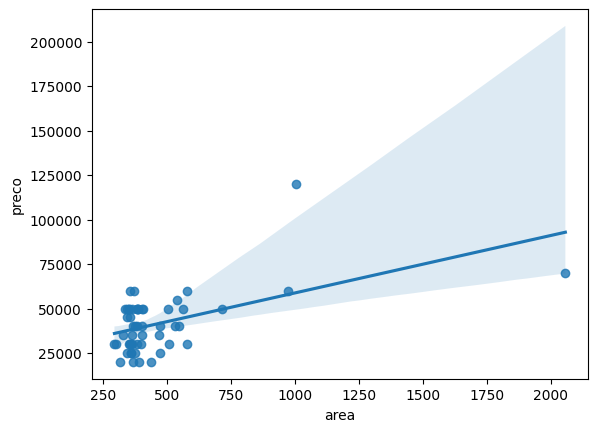

In [14]:
sns.regplot(x='area', y='preco', data=imoveis)
# não temos uma lineariedade muito forte, mas ainda assim é possível traçar a linha

In [16]:
imoveis.describe()
# Como a area está na casa das centenas o preço está nos milhares
# para não atrapalhar o modelo vamos colocar uma normalização

,area,preco
count,54.000000,54.000000
mean,457.483519,41296.296296
std,261.527053,16488.566227
min,293.220000,20000.000000
25%,355.087500,30000.000000
50%,380.360000,40000.000000
75%,470.087500,50000.000000
max,2057.570000,120000.000000


In [17]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [18]:
imoveis_norm = pd.DataFrame(scaler.fit_transform(imoveis), index=imoveis.index, columns=imoveis.columns)

In [20]:
imoveis_norm.head()

,area,preco
0,0.037776,0.05
1,0.033950,0.25
2,0.027585,0.25
3,0.080919,0.00
4,0.027517,0.05


In [22]:
imoveis_norm.describe()

,area,preco
count,54.000000,54.000000
mean,0.093101,0.212963
std,0.148229,0.164886
min,0.000000,0.000000
25%,0.035065,0.100000
50%,0.049389,0.200000
75%,0.100245,0.300000
max,1.000000,1.000000


<Axes: xlabel='area', ylabel='preco'>

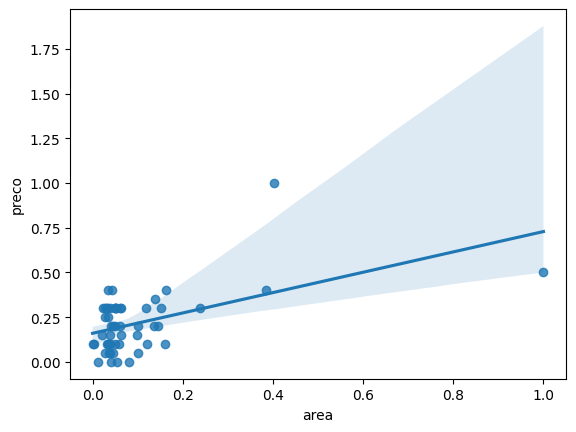

In [23]:
sns.regplot(x='area', y='preco', data=imoveis_norm)

In [24]:
import statsmodels.formula.api as smf

In [26]:
# Nem sempre vamos pegar correlações perfeitas, nesse caso o r^2 está muito baixo, isso é por conta da baixa relação entre os dados

function = 'preco~area'

model = smf.ols(formula=function, data=imoveis_norm).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  preco   R-squared:                       0.262
Model:                            OLS   Adj. R-squared:                  0.247
Method:                 Least Squares   F-statistic:                     18.41
Date:                Tue, 16 Jan 2024   Prob (F-statistic):           7.76e-05
Time:                        09:20:24   Log-Likelihood:                 29.402
No. Observations:                  54   AIC:                            -54.80
Df Residuals:                      52   BIC:                            -50.83
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1600      0.023      6.942      0.0

Iniciando o modelo de machine Learning

In [28]:
x = imoveis_norm[['area']]
y = imoveis_norm[['preco']]

In [31]:
# Separando as variáveis de treino e teste
# o Teste size mostra quanto vai para cara tipo de variável 0.20 é 20 %

x_train,x_test, y_train,y_test = train_test_split(x,y, test_size=0.20, random_state=42)

lr = LinearRegression()

lr.fit(x_train,y_train)

LinearRegression()

In [32]:
# Retirando as metricas
r_sq = lr.score(x_train,y_train)
print(r_sq)

# Um erro quandrado baixo

0.2754399686961232


In [37]:
#<etricas do treino
y_pred_treino = lr.predict(x_train)
print('MAE: ', metrics.mean_absolute_error(y_train, y_pred_treino))

print('MSE: ', metrics.mean_squared_error(y_train, y_pred_treino))

print('MAE: ', np.sqrt(metrics.mean_squared_error(y_train, y_pred_treino)))


MAE:  0.1068423059800295
MSE:  0.019987119738590717
MAE:  0.1413758103021543


In [39]:
# Treinando teste
lr.fit(x_test, y_test)

LinearRegression()

In [41]:
# metricas do teste
y_pred_teste = lr.predict(x_test)

print('MAE: ', metrics.mean_absolute_error(y_test, y_pred_teste))

print('MSE: ', metrics.mean_squared_error(y_test, y_pred_teste))

print('MAE: ', np.sqrt(metrics.mean_squared_error(y_test, y_pred_teste)))

# Um comportamento muito parecido entre essas metricas, isso é algo bom

MAE:  0.10852020952335328
MSE:  0.01746864564020875
MAE:  0.13216900408268478
